## 1. Import Libraries


In [61]:
import sys
import os
# Додавање путања до фолдера где се налазе модули
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../utils'))
sys.path.append(os.path.abspath('../object_tracking'))
sys.path.append(os.path.abspath('../drawing'))
sys.path.append(os.path.abspath('../team_classifier'))

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from object_tracking.tracker import Tracker
from utils import video_control_utils
from drawing import Drawer
from team_classifier import TeamClassifier

In [63]:
# Функција за приказивање слика
def display_image(image, title=''):
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [80]:
# Функција за кластерисање пиксела и добијање доминантних боја у RGB простору
def get_dominant_color(image, k=2):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    clustered_image = labels.reshape(image.shape[:2])
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    # Избацивање црне боје из доминантних боја
    non_black_colors = [color for color in dominant_colors if not np.all(color == [0, 0, 0])]
    if len(non_black_colors) == 0:  # У случају да су све боје црне, задржати бар једну
        non_black_colors = dominant_colors
    dominant_colors = np.array(non_black_colors)
    
    return dominant_colors, clustered_image

In [65]:
# Функција за уклањање црних пиксела
def remove_black_pixels(image):
    non_black_pixels_mask = np.any(image != [0, 0, 0], axis=-1)
    return image[non_black_pixels_mask]

In [66]:
# Функција за класификацију боја у тимове
def classify_team(color, team_colors):
    color = np.array(color)
    distances = [np.linalg.norm(color - team_color) for team_color in team_colors]
    return np.argmin(distances)

In [67]:
# Функција за креирање маске за уклањање зелених пиксела
def create_green_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Дефинисање граница за зелене боје у HSV простору
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Креирање маске за зелене боје
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Инвертовање маске
    mask_inv = cv2.bitwise_not(mask_green)

    return mask_inv

In [86]:
def create_clustered_image(clustered_labels, cluster_centers, image_shape):
    h, w = image_shape
    output_image = np.zeros((h, w, 3), dtype=np.uint8)
    
    label_idx = 0
    for i in range(h):
        for j in range(w):
            if label_idx < len(clustered_labels):  # Додата провера да не пређе границе
                cluster_idx = clustered_labels[label_idx]
                output_image[i, j] = cluster_centers[cluster_idx]
            label_idx += 1
    
    return output_image

In [69]:
# Функција за уклањање црних пиксела
def remove_black_pixels(image):
    non_black_pixels_mask = np.any(image != [0, 0, 0], axis=-1)
    return image[non_black_pixels_mask]

In [70]:
# Функција за исецање централног дела са дресом
def crop_to_uniform(image):
    h, w = image.shape[:2]
    # Исецање централног дела слике (од 20% до 80% висине и ширине)
    top = int(h * 0.2)
    bottom = int(h * 0.8)
    left = int(w * 0.2)
    right = int(w * 0.8)
    cropped_image = image[top:bottom, left:right]
    return cropped_image

In [71]:
# Учитавање видео фрејма и детекција објеката
video = video_control_utils.read_video('../data/proba.mp4')
tracker = Tracker('../model/yolov8mf.pt')
tracks = tracker.get_object_tracks(video, read_from_cache=True, cache_path='../cache/tracks_cache.pkl')


In [72]:
# Дефинисање боја тимова (пример за RGB)
team_colors_rgb = [np.array([255, 0, 0]), np.array([0, 0, 255])]  # Црвена и плава у RGB


In [73]:
# Изаберите специфичне фрејмове које желите анализирати
specific_frames = [10, 20, 30]  # Пример фрејмова који ће бити анализирани


In [74]:
for frame_num in specific_frames:
    frame = video[frame_num]
    player_dict = tracks["players"][frame_num]
    

Фрејм број 10
Величина фрејма: (720, 1280, 3)
Играча 4 bounding box координате: 770, 121, 813, 226


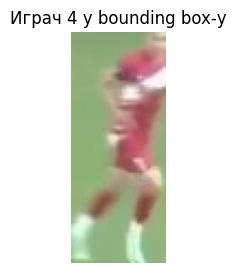

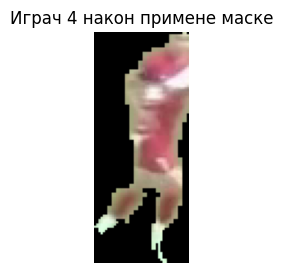

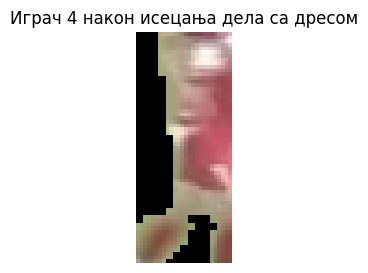

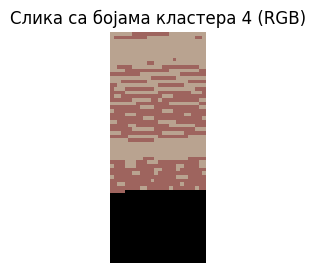

Доминантне боје за играча 4 (RGB): [[ 94 100 158]
 [144 163 185]]
Играчу 4 је додељен тим: 1
Играча 6 bounding box координате: 202, 99, 250, 197


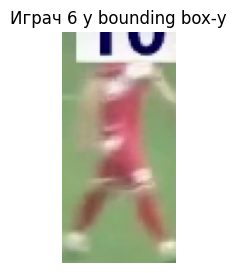

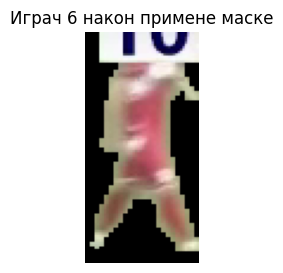

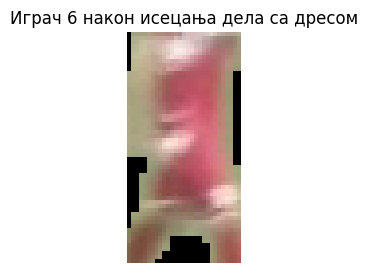

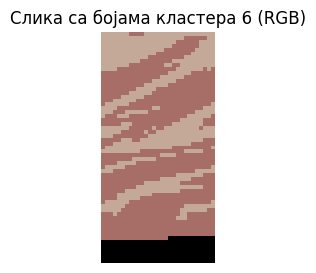

Доминантне боје за играча 6 (RGB): [[152 168 196]
 [103 110 166]]
Играчу 6 је додељен тим: 1
Играча 8 bounding box координате: 614, 557, 687, 720


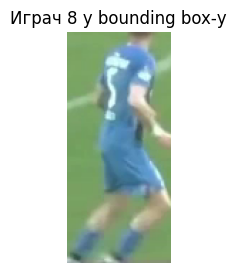

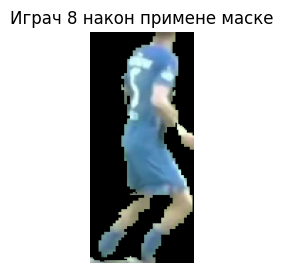

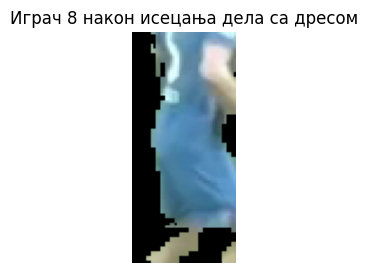

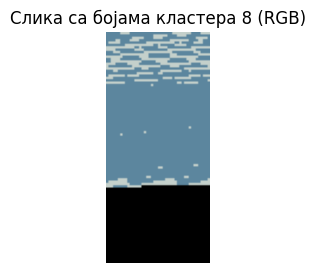

Доминантне боје за играча 8 (RGB): [[158 134  92]
 [203 208 196]]
Играчу 8 је додељен тим: 0
Играча 2 bounding box координате: 556, 238, 619, 370


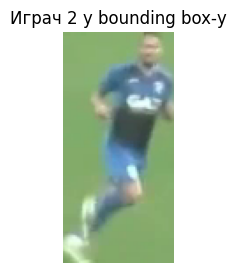

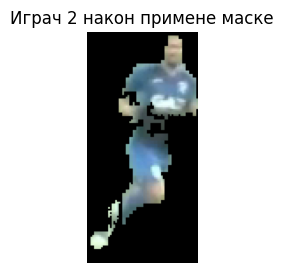

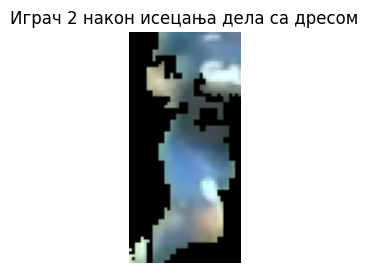

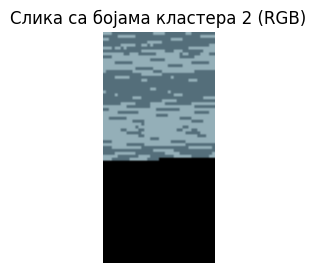

Доминантне боје за играча 2 (RGB): [[122 110  84]
 [184 175 148]]
Играчу 2 је додељен тим: 0
Играча 1 bounding box координате: 257, 107, 293, 218


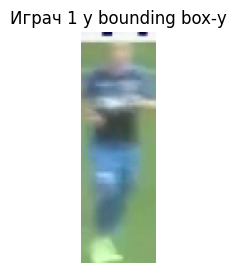

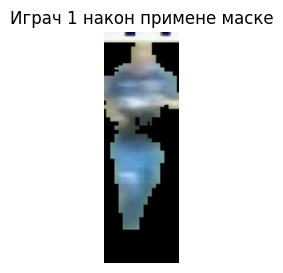

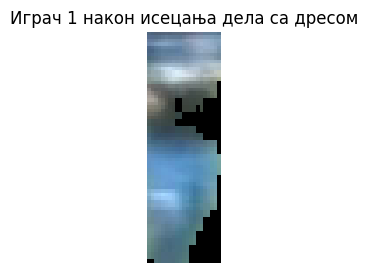

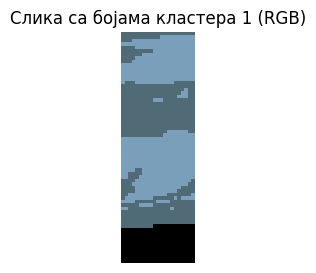

Доминантне боје за играча 1 (RGB): [[187 159 122]
 [118 106  80]]
Играчу 1 је додељен тим: 0
Играча 12 bounding box координате: 97, 217, 153, 355


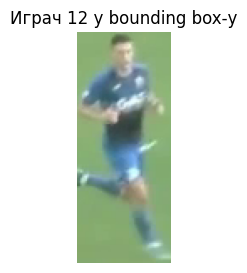

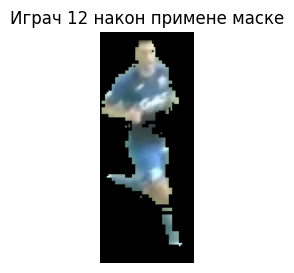

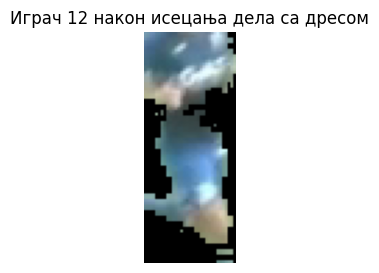

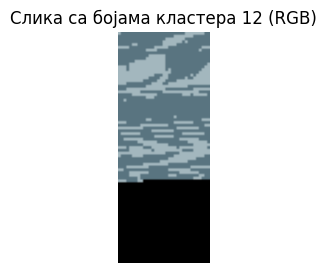

Доминантне боје за играча 12 (RGB): [[128 116  89]
 [190 183 163]]
Играчу 12 је додељен тим: 0
Играча 3 bounding box координате: 898, 337, 966, 466


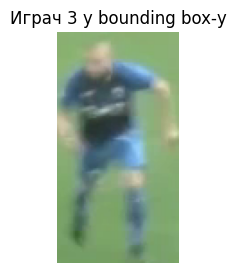

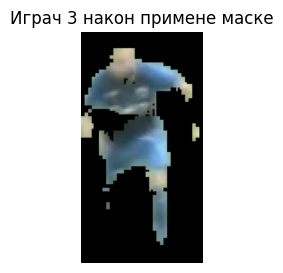

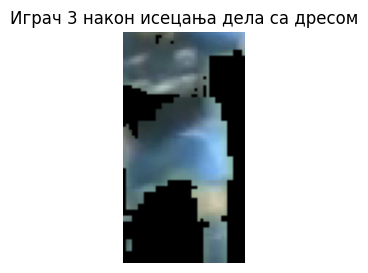

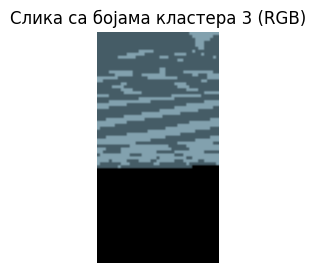

Доминантне боје за играча 3 (RGB): [[174 161 130]
 [102  92  69]]
Играчу 3 је додељен тим: 0
Играча 7 bounding box координате: 1149, 248, 1213, 402


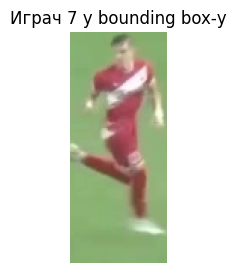

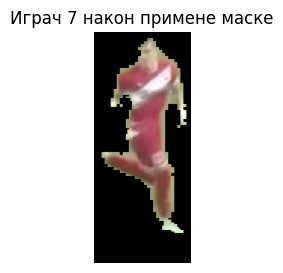

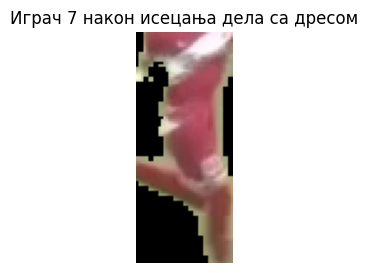

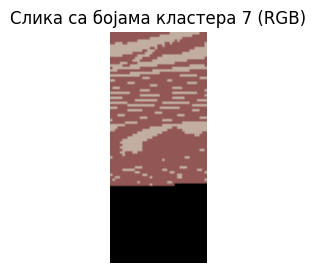

Доминантне боје за играча 7 (RGB): [[161 174 194]
 [ 84  87 146]]
Играчу 7 је додељен тим: 1
Играча 10 bounding box координате: 277, 310, 336, 482


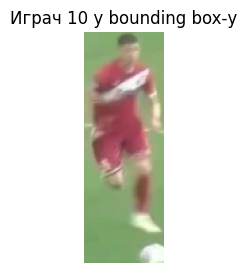

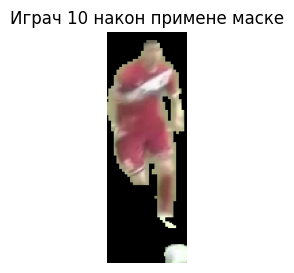

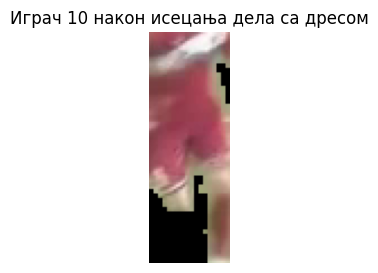

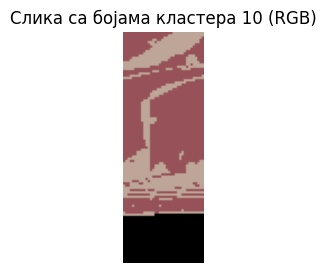

Доминантне боје за играча 10 (RGB): [[152 166 189]
 [ 88  82 150]]
Играчу 10 је додељен тим: 1
Фрејм број 20
Величина фрејма: (720, 1280, 3)
Играча 2 bounding box координате: 592, 242, 648, 376


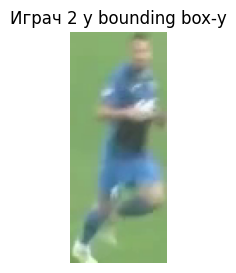

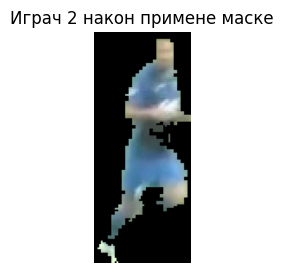

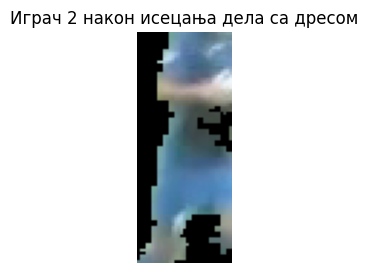

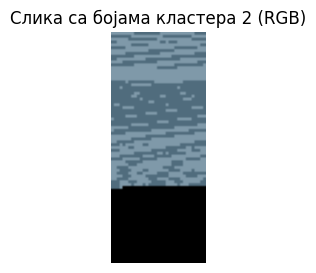

Доминантне боје за играча 2 (RGB): [[169 153 127]
 [125 108  80]]
Играчу 2 је додељен тим: 0
Играча 4 bounding box координате: 775, 114, 826, 225


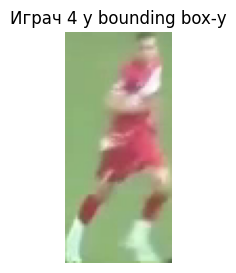

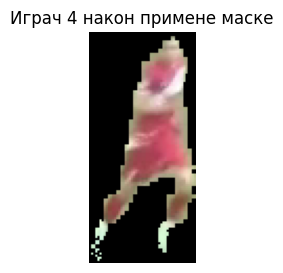

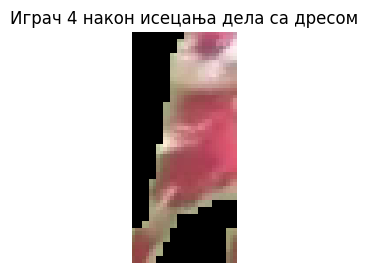

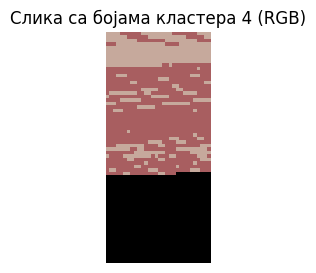

Доминантне боје за играча 4 (RGB): [[ 96  94 168]
 [156 169 198]]
Играчу 4 је додељен тим: 1
Играча 1 bounding box координате: 212, 109, 244, 219


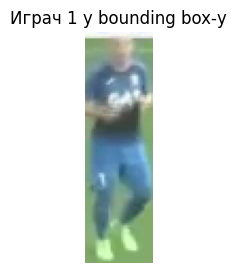

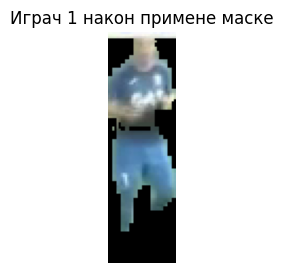

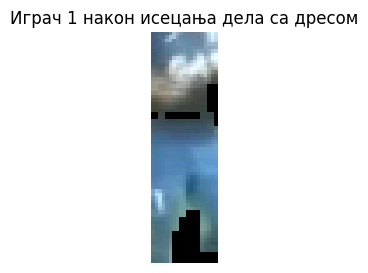

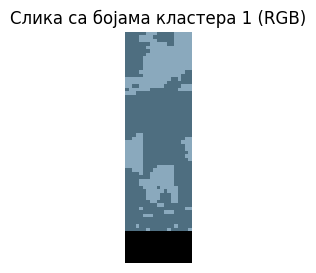

Доминантне боје за играча 1 (RGB): [[189 169 138]
 [128 110  78]]
Играчу 1 је додељен тим: 0
Играча 6 bounding box координате: 177, 82, 205, 190


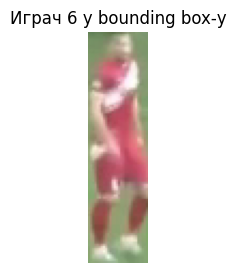

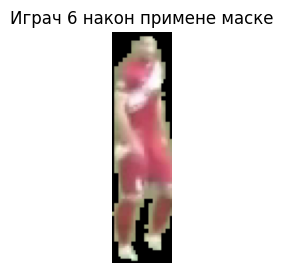

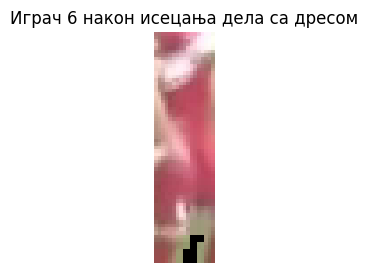

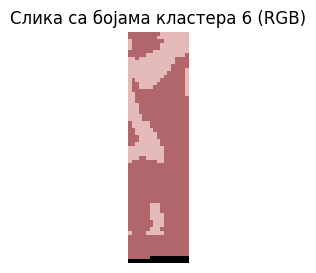

Доминантне боје за играча 6 (RGB): [[186 186 228]
 [106 102 176]]
Играчу 6 је додељен тим: 1
Играча 12 bounding box координате: 114, 210, 177, 356


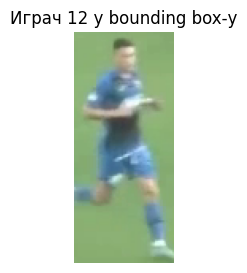

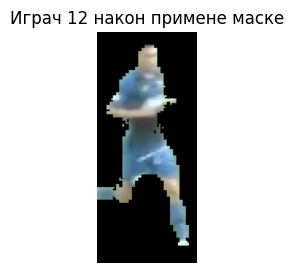

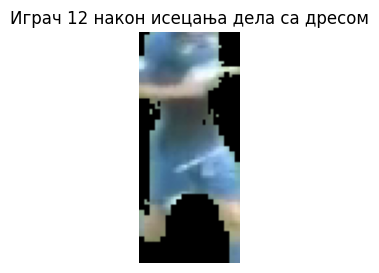

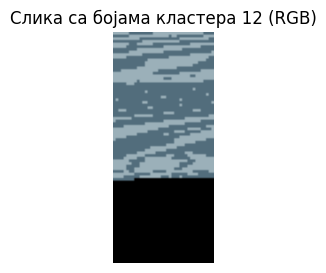

Доминантне боје за играча 12 (RGB): [[124 109  82]
 [185 176 155]]
Играчу 12 је додељен тим: 0
Играча 10 bounding box координате: 290, 329, 342, 489


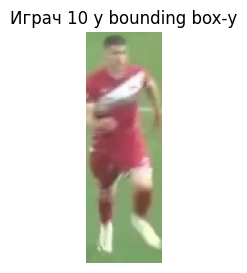

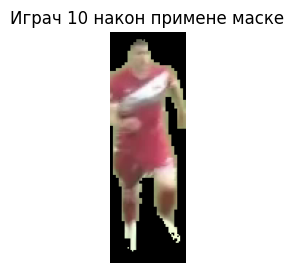

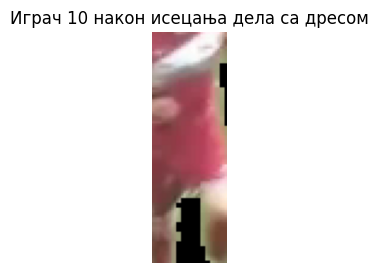

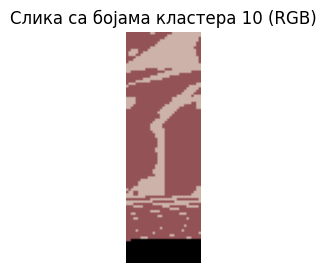

Доминантне боје за играча 10 (RGB): [[170 178 205]
 [ 86  83 147]]
Играчу 10 је додељен тим: 1
Играча 8 bounding box координате: 675, 546, 771, 717


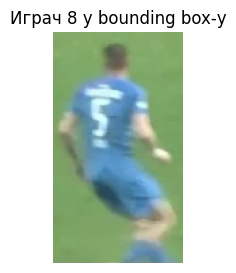

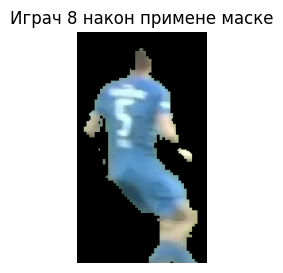

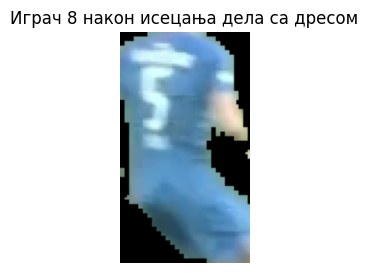

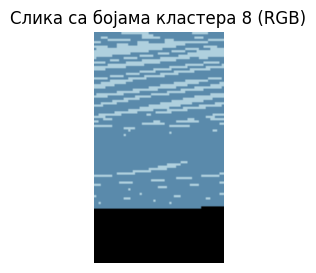

Доминантне боје за играча 8 (RGB): [[222 208 175]
 [171 138  90]]
Играчу 8 је додељен тим: 0
Играча 3 bounding box координате: 870, 341, 926, 499


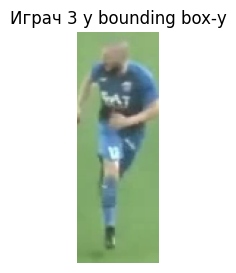

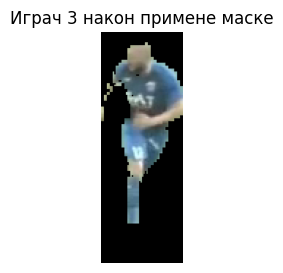

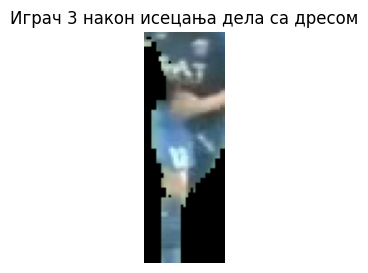

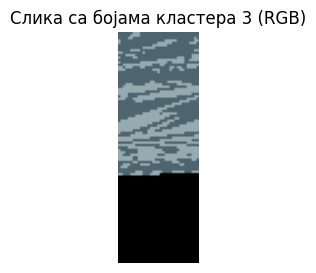

Доминантне боје за играча 3 (RGB): [[176 171 150]
 [111 100  78]]
Играчу 3 је додељен тим: 0
Играча 7 bounding box координате: 1213, 244, 1260, 382


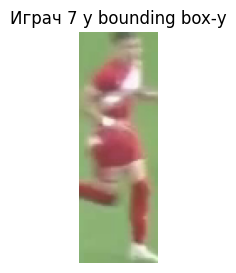

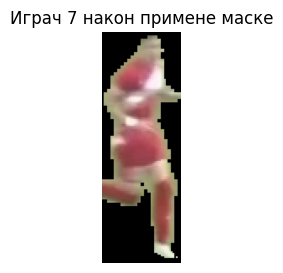

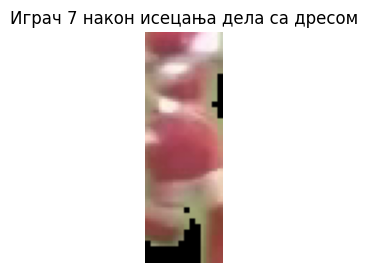

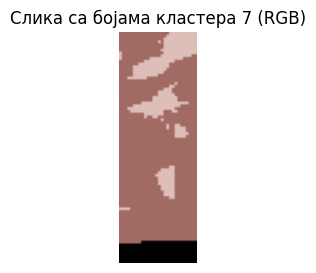

Доминантне боје за играча 7 (RGB): [[ 99 107 161]
 [184 190 221]]
Играчу 7 је додељен тим: 1
Фрејм број 30
Величина фрејма: (720, 1280, 3)
Играча 2 bounding box координате: 649, 212, 706, 341


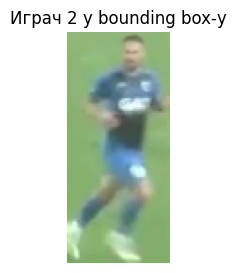

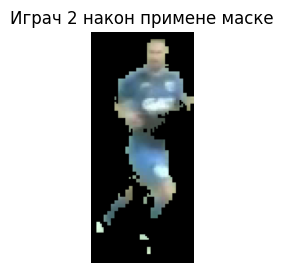

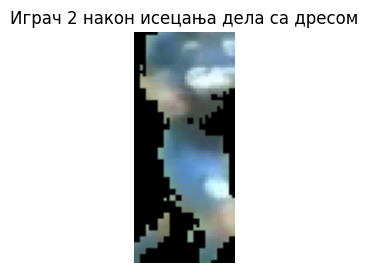

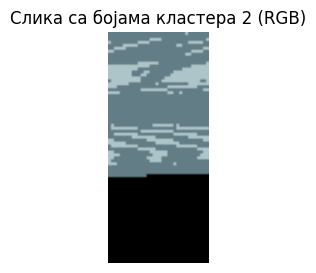

Доминантне боје за играча 2 (RGB): [[135 125  99]
 [201 196 173]]
Играчу 2 је додељен тим: 0
Играча 10 bounding box координате: 339, 323, 411, 479


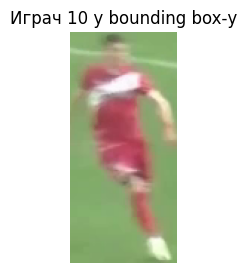

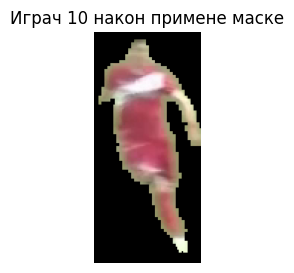

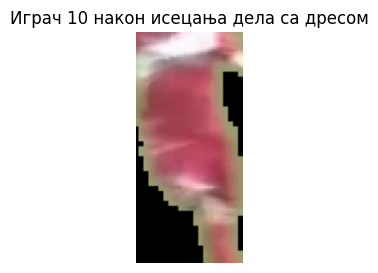

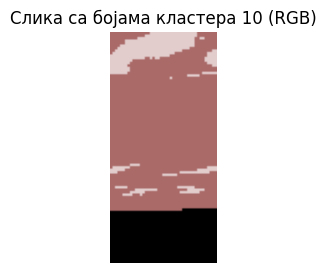

Доминантне боје за играча 10 (RGB): [[104 106 169]
 [204 204 226]]
Играчу 10 је додељен тим: 1
Играча 4 bounding box координате: 790, 95, 837, 200


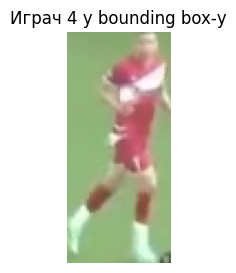

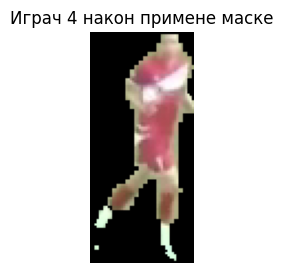

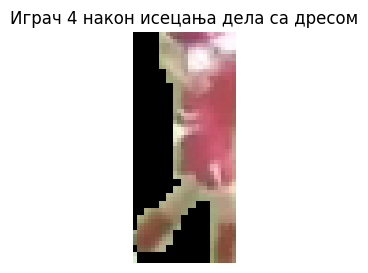

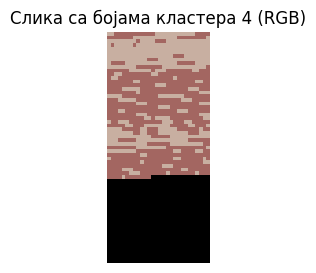

Доминантне боје за играча 4 (RGB): [[ 97 102 163]
 [161 175 200]]
Играчу 4 је додељен тим: 1
Играча 3 bounding box координате: 839, 324, 905, 465


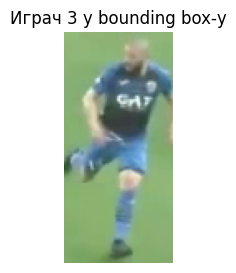

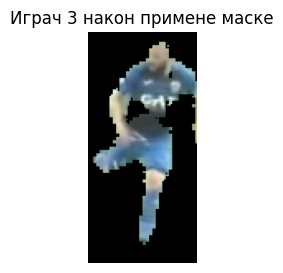

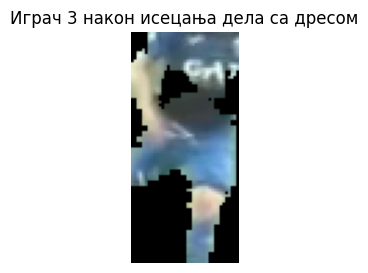

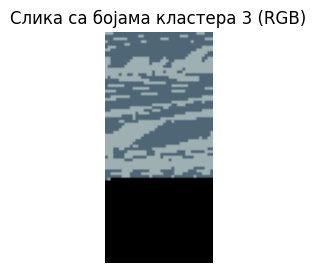

Доминантне боје за играча 3 (RGB): [[178 176 158]
 [117 102  78]]
Играчу 3 је додељен тим: 0
Играча 12 bounding box координате: 198, 186, 257, 322


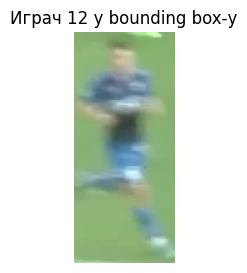

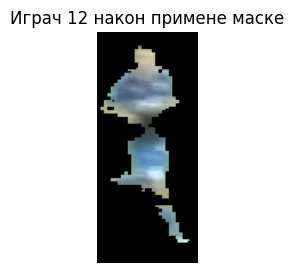

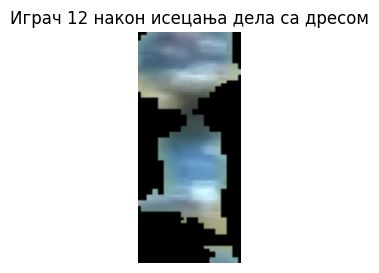

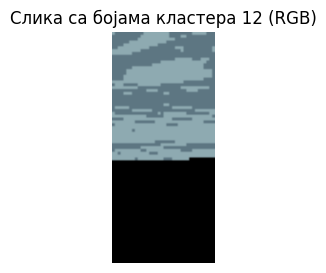

Доминантне боје за играча 12 (RGB): [[177 170 142]
 [130 118  93]]
Играчу 12 је додељен тим: 0
Играча 8 bounding box координате: 714, 528, 801, 679


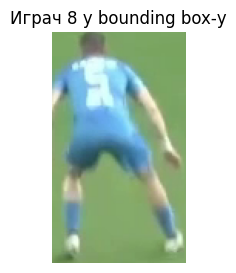

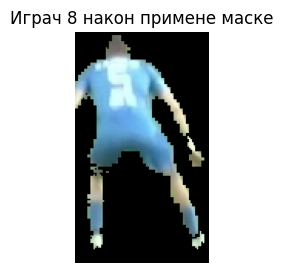

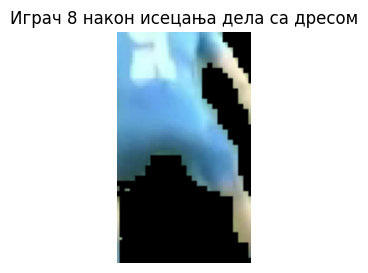

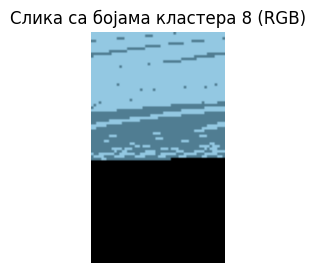

Доминантне боје за играча 8 (RGB): [[146 125  80]
 [226 200 147]]
Играчу 8 је додељен тим: 0
Играча 7 bounding box координате: 1219, 210, 1271, 341


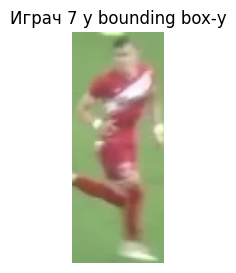

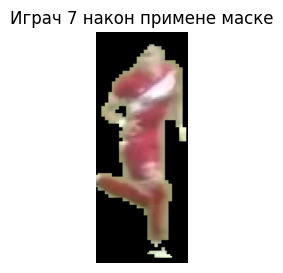

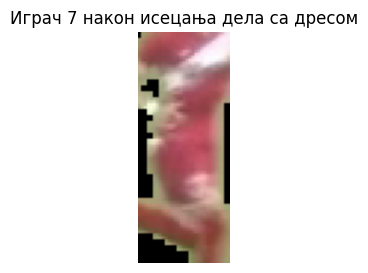

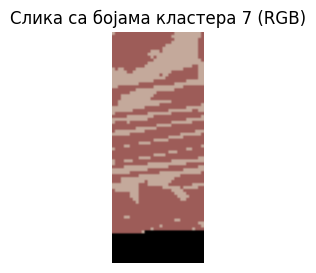

Доминантне боје за играча 7 (RGB): [[ 88  92 157]
 [155 169 196]]
Играчу 7 је додељен тим: 1


In [87]:
# Визуелизација и класификација играча по бојама
for frame_num in specific_frames:
    frame = video[frame_num]
    player_dict = tracks["players"][frame_num]
    
    print(f"Фрејм број {frame_num}")
    print(f"Величина фрејма: {frame.shape}")

    for track_id, player in player_dict.items():
        bounding_box = player["bounding_box"]
        # Конверзија bounding box координата у целе бројеве
        x1, y1, x2, y2 = map(int, bounding_box)
        
        print(f"Играча {track_id} bounding box координате: {x1}, {y1}, {x2}, {y2}")
        
        # Изрезивање bounding box-а
        player_image = frame[y1:y2, x1:x2]
        
        # Примена маске за уклањање зелених пиксела
        mask = create_green_mask(player_image)
        player_image_masked = cv2.bitwise_and(player_image, player_image, mask=mask)
        
        # Исецање дела са дресом
        player_image_cropped = crop_to_uniform(player_image_masked)
        
        # Уклањање црних пиксела из исечене слике
        player_image_no_black = remove_black_pixels(player_image_cropped)
        if player_image_no_black.size == 0:
            print(f"ГРЕШКА: Слика играча {track_id} је празна након уклањања црних пиксела")
            continue
        
        # Кластерисање боја у RGB простору
        dominant_colors, clustered_labels = get_dominant_color(player_image_no_black, k=2)
        
        # Визуелизација кластера
        output_image = create_clustered_image(clustered_labels, dominant_colors, player_image_cropped.shape[:2])
        
        # Приказ изрезаног bounding box-а
        display_image(player_image, f'Играч {track_id} у bounding box-у')
        display_image(player_image_masked, f'Играч {track_id} након примене маске')
        display_image(player_image_cropped, f'Играч {track_id} након исецања дела са дресом')
        display_image(output_image, f'Слика са бојама кластера {track_id} (RGB)')
        
        # Класификација у тимове
        team = classify_team(dominant_colors[0], team_colors_rgb)
        
        player["team_color"] = team_colors_rgb[team]
        
        print(f'Доминантне боје за играча {track_id} (RGB):', dominant_colors)
        print(f'Играчу {track_id} је додељен тим: {team}')


In [ ]:
# Визуелизација и класификација играча по бојама
for frame_num in specific_frames:
    frame = video[frame_num]
    player_dict = tracks["players"][frame_num]
    
    print(f"Фрејм број {frame_num}")
    print(f"Величина фрејма: {frame.shape}")

    for track_id, player in player_dict.items():
        bounding_box = player["bounding_box"]
        # Конверзија bounding box координата у целе бројеве
        x1, y1, x2, y2 = map(int, bounding_box)
        
        print(f"Играча {track_id} bounding box координате: {x1}, {y1}, {x2}, {y2}")
        
        # Проверимо да ли су bounding box координате исправне
        if x1 < 0 or y1 < 0 or x2 > frame.shape[1] or y2 > frame.shape[0]:
            print(f"ГРЕШКА: Неправилне bounding box координате за играча {track_id}")
            continue
        
        player_image = frame[y1:y2, x1:x2]
        
        # Креирање маске и примене на слику играча
        mask = create_green_mask(player_image)
        player_image_masked = cv2.bitwise_and(player_image, player_image, mask=mask)
        
        # Приказ изрезаног bounding box-а
        display_image(player_image, f'Играч {track_id} у bounding box-у')
        display_image(player_image_masked, f'Играч {track_id} након примене маске')

        # Кластерисање боја у различитим колорним просторима
        for color_space in ['RGB', 'HSV', 'LAB']:
            dominant_colors, clustered_image = get_dominant_color(player_image_masked, k=2, color_space=color_space)
            
            # Визуелизација кластера
            output_image = create_clustered_image(clustered_image, dominant_colors)
            
            display_image(output_image, f'Слика са бојама кластера {track_id} ({color_space})')
            
            # Класификација у тимове
            team = classify_team(dominant_colors[0], team_colors_rgb)
            
            player["team_color"] = team_colors_rgb[team]
            
            print(f'Доминантне боје за играча {track_id} ({color_space}):', dominant_colors)
            print(f'Играчу {track_id} је додељен тим: {team}')

In [ ]:
# Визуелизација и класификација играча по бојама
for frame_num in specific_frames:
    frame = video[frame_num]
    player_dict = tracks["players"][frame_num]
    
    print(f"Фрејм број {frame_num}")
    print(f"Величина фрејма: {frame.shape}")

    for track_id, player in player_dict.items():
        bounding_box = player["bounding_box"]
        # Конверзија bounding box координата у целе бројеве
        x1, y1, x2, y2 = map(int, bounding_box)
        
        print(f"Играча {track_id} bounding box координате: {x1}, {y1}, {x2}, {y2}")
        
        # Проверимо да ли су bounding box координате исправне
        if x1 < 0 or y1 < 0 or x2 > frame.shape[1] or y2 > frame.shape[0]:
            print(f"ГРЕШКА: Неправилне bounding box координате за играча {track_id}")
            continue
        
        player_image = frame[y1:y2, x1:x2]
        
        # Креирање маске и примене на слику играча
        #mask = create_green_mask(player_image)
        #player_image_masked = cv2.bitwise_and(player_image, player_image, mask=mask)
        
        # Приказ изрезаног bounding box-а
        display_image(player_image, f'Играч {track_id} у bounding box-у')
        #display_image(player_image_masked, f'Играч {track_id} након примене маске')

        # Кластерисање боја у различитим колорним просторима
        for color_space in ['RGB', 'HSV', 'LAB']:
            dominant_colors, clustered_image = get_dominant_color(player_image, k=2, color_space=color_space)
            
            # Визуелизација кластера
            output_image = create_clustered_image(clustered_image, dominant_colors)
            
            display_image(output_image, f'Слика са бојама кластера {track_id} ({color_space})')
            
            # Класификација у тимове
            team = classify_team(dominant_colors[0], team_colors_rgb)
            
            player["team_color"] = team_colors_rgb[team]
            
            print(f'Доминантне боје за играча {track_id} ({color_space}):', dominant_colors)
            print(f'Играчу {track_id} је додељен тим: {team}')

In [ ]:
# Кластерисање пиксела и добијање доминантних боја
dominant_colors, clustered_image = get_dominant_color(player_image, k=2)


In [ ]:
# Стварање слике са бојама кластера
output_image = create_clustered_image(clustered_image, dominant_colors)

In [ ]:
# Приказ оригиналне слике и кластерисане слике
display_image(player_image, 'Оригинална слика')
display_image(output_image, 'Слика са бојама кластера')

print('Доминантне боје:', dominant_colors)